<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apprentissage automatique - Former/Tester**


Évaluez votre modèle
En Machine Learning, nous créons des modèles pour prédire le résultat de certains événements, comme dans le chapitre précédent où nous avons prédit l'émission de CO2 d'une voiture lorsque nous connaissions le poids et la cylindrée du moteur.

Pour mesurer si le modèle est assez bon, nous pouvons utiliser une méthode appelée Train/Test.

Qu'est-ce que l'entraînement/le test ?
Train/Test est une méthode pour mesurer la précision de votre modèle.

Il s'appelle Train/Test car vous divisez l'ensemble de données en deux ensembles : un ensemble d'apprentissage et un ensemble de test.

80 % pour la formation et 20 % pour les tests.

Vous entraînez le modèle à l'aide de l'ensemble d'entraînement.

Vous testez le modèle à l'aide de l'ensemble de test.

Former le modèle signifie créer le modèle.

Tester le modèle signifie tester la précision du modèle.

Commencez avec un ensemble de données
Commencez avec un ensemble de données que vous souhaitez tester.

Notre ensemble de données illustre 100 clients dans un magasin et leurs habitudes d'achat.

**Exemple**

Résultat:
L'axe des x représente le nombre de minutes avant de faire un achat.

L'axe y représente le montant d'argent dépensé pour l'achat.

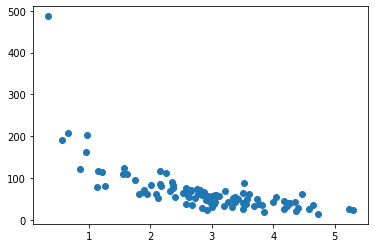

In [1]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

Fractionner en train/test
L' ensemble d'apprentissage doit être une sélection aléatoire de 80 % des données d'origine.

L' ensemble de test devrait être les 20 % restants.

In [3]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

Afficher l'ensemble d'entraînement
Affichez le même nuage de points avec l'ensemble d'apprentissage :

Exemple

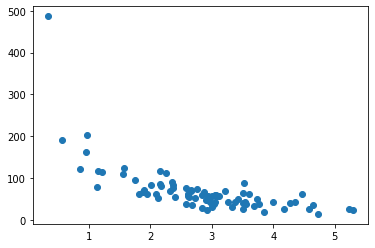

In [4]:
plt.scatter(train_x, train_y)
plt.show()

Afficher l'ensemble de test
Pour nous assurer que l'ensemble de test n'est pas complètement différent, nous examinerons également l'ensemble de test.

**Exemple**

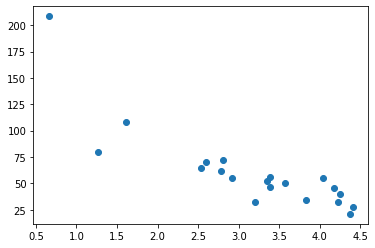

In [5]:
plt.scatter(test_x, test_y)
plt.show()

Adapter l'ensemble de données
À quoi ressemble l'ensemble de données ? À mon avis, je pense que le meilleur ajustement serait une régression polynomiale , alors traçons une ligne de régression polynomiale.

Pour tracer une ligne à travers les points de données, nous utilisons la plot()méthode du module matplotlib :

Exemple **texte en gras**
Tracez une droite de régression polynomiale passant par les points de données :

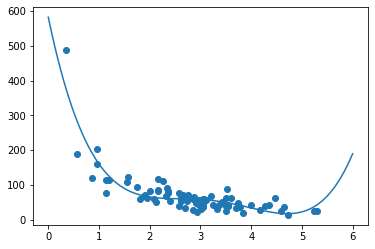

In [6]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

Le résultat peut étayer ma suggestion selon laquelle l'ensemble de données correspond à une régression polynomiale, même si cela nous donnerait des résultats étranges si nous essayions de prédire des valeurs en dehors de l'ensemble de données. Exemple : la ligne indique qu'un client passant 6 minutes dans le magasin effectuerait un achat d'une valeur de 200. C'est probablement un signe de surajustement.

Mais qu'en est-il du score R au carré ? Le score R au carré est un bon indicateur de la mesure dans laquelle mon ensemble de données correspond au modèle.

R2
Vous souvenez-vous de R2, également connu sous le nom de R-carré ?

Il mesure la relation entre l'axe des x et l'axe des y, et la valeur varie de 0 à 1, où 0 signifie aucune relation et 1 signifie totalement lié.

Le module sklearn a une méthode appelée r2_score() qui nous aidera à trouver cette relation.

Dans ce cas, nous aimerions mesurer la relation entre les minutes qu'un client reste dans le magasin et combien d'argent il dépense.

**Exemple**
Dans quelle mesure mes données d'entraînement s'intègrent-elles dans une régression polynomiale ?

In [7]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))


Remarque : Le résultat 0,799 indique qu'il existe une relation OK.

Apportez le kit de test
Nous avons maintenant créé un modèle qui est correct, du moins en ce qui concerne les données d'entraînement.

Maintenant, nous voulons également tester le modèle avec les données de test, pour voir si cela nous donne le même résultat.

Exemple
Trouvons le score R2 lors de l'utilisation des données de test :

In [8]:
import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343566


Remarque : Le résultat 0,809 montre que le modèle correspond également à l'ensemble de test, et nous sommes convaincus que nous pouvons utiliser le modèle pour prédire les valeurs futures.

Prédire les valeurs
Maintenant que nous avons établi que notre modèle est OK, nous pouvons commencer à prédire de nouvelles valeurs.

Exemple
Combien d'argent un client acheteur dépensera-t-il s'il reste 5 minutes dans le magasin ?

In [9]:
print(mymodel(5))

22.8796259181172


L'exemple prédit que le client dépensera 22,88 dollars, comme cela semble correspondre au schéma :

**Apprentissage automatique - Matrice de confusion**

Sur cette page, W3schools.com collabore avec NYC Data Science Academy , pour fournir un contenu de formation numérique à nos étudiants.

Qu'est-ce qu'une matrice de confusion ?
Il s'agit d'un tableau utilisé dans les problèmes de classification pour déterminer où se sont produites les erreurs dans le modèle.

Les lignes représentent les classes réelles que les résultats auraient dû être. Alors que les colonnes représentent les prédictions que nous avons faites. En utilisant ce tableau, il est facile de voir quelles prédictions sont fausses.

Création d'une matrice de confusion
Des matrices de confusion peuvent être créées par des prédictions faites à partir d'une régression logistique.

Pour l'instant, nous allons générer des valeurs réelles et prédites en utilisant NumPy :

import numpy

Ensuite, nous devrons générer les nombres pour les valeurs "réelles" et "prédites".

actual = numpy.random.binomial(1, 0.9, size = 1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000)

Afin de créer la matrice de confusion, nous devons importer des métriques à partir du module sklearn.

from sklearn import metrics

Une fois les métriques importées, nous pouvons utiliser la fonction de matrice de confusion sur nos valeurs réelles et prédites.

confusion_matrix = metrics.confusion_matrix(actual, predicted)

Pour créer un affichage visuel plus interprétable, nous devons convertir le tableau en un affichage matriciel de confusion.

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

Visualiser l'affichage nécessite d'importer pyplot depuis matplotlib.

import matplotlib.pyplot as plt

Enfin pour afficher le tracé nous pouvons utiliser les fonctions plot() et show() de pyplot.

cm_display.plot()
plt.show()

Voir l'exemple entier en action :

Exemple

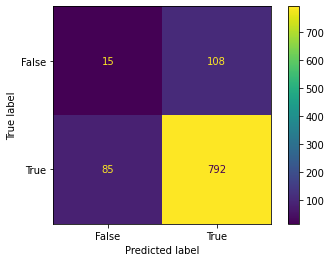

In [10]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

Métriques créées
La matrice nous fournit de nombreuses mesures utiles qui nous aident à évaluer notre modèle de classification.

Les différentes mesures comprennent : l'exactitude, la précision, la sensibilité (rappel), la spécificité et le score F, expliqués ci-dessous.

Précision
La précision mesure la fréquence à laquelle le modèle est correct.

Comment calculer
(Vrai positif + Vrai négatif) / Prédictions totales

**Exemple**
Accuracy = metrics.accuracy_score(actual, predicted)

Précision
Parmi les positifs prédits, quel pourcentage est vraiment positif ?

Comment calculer
Vrai positif / (vrai positif + faux positif)

La précision n'évalue pas les cas négatifs correctement prédits :

Exemple
Precision = metrics.precision_score(actual, predicted)

Sensibilité (Rappel)
Parmi tous les cas positifs, quel pourcentage sont prédits positifs ?

La sensibilité (parfois appelée rappel) mesure la capacité du modèle à prédire les positifs.

Cela signifie qu'il examine les vrais positifs et les faux négatifs (qui sont des positifs qui ont été incorrectement prédits comme négatifs).

Comment calculer
Vrai positif / (vrai positif + faux négatif)

La sensibilité permet de comprendre dans quelle mesure le modèle prédit que quelque chose est positif :

Exemple
Sensitivity_recall = metrics.recall_score(actual, predicted)

Spécificité
Dans quelle mesure le modèle prédit-il des résultats négatifs ?

La spécificité est similaire à la sensibilité, mais la considère du point de vue des résultats négatifs.

Comment calculer
Vrai négatif / (vrai négatif + faux positif)

Comme c'est juste l'opposé de Recall, nous utilisons la fonction rappel_score, en prenant l'étiquette de position opposée :

Exemple
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

Note F
Le score F est la "moyenne harmonique" de la précision et de la sensibilité.

Il prend en compte à la fois les cas de faux positifs et de faux négatifs et convient aux ensembles de données déséquilibrés.

Comment calculer
2 * ((Précision * Sensibilité) / (Précision + Sensibilité))

Ce score ne prend pas en compte les valeurs True Negative :

Exemple
F1_score = metrics.f1_score(actual, predicted)

Tous les calculs en un :

**Machine Learning - Clustering hiérarchique**

Sur cette page, W3schools.com collabore avec NYC Data Science Academy , pour fournir un contenu de formation numérique à nos étudiants.

Classification hiérarchique
Le clustering hiérarchique est une méthode d'apprentissage non supervisée pour le clustering de points de données. L'algorithme construit des clusters en mesurant les dissemblances entre les données. L'apprentissage non supervisé signifie qu'un modèle n'a pas besoin d'être formé et que nous n'avons pas besoin d'une variable "cible". Cette méthode peut être utilisée sur toutes les données pour visualiser et interpréter la relation entre les points de données individuels.

Ici, nous utiliserons le clustering hiérarchique pour regrouper les points de données et visualiser les clusters à l'aide d'un dendrogramme et d'un nuage de points.

Comment ça marche?
Nous utiliserons le clustering agglomératif, un type de clustering hiérarchique qui suit une approche ascendante. Nous commençons par traiter chaque point de données comme son propre cluster. Ensuite, nous joignons les clusters qui ont la distance la plus courte entre eux pour créer des clusters plus grands. Cette étape est répétée jusqu'à ce qu'un grand groupe soit formé contenant tous les points de données.

Le regroupement hiérarchique nous oblige à décider à la fois d'une méthode de distance et de liaison. Nous utiliserons la distance euclidienne et la méthode de liaison de Ward, qui tente de minimiser la variance entre les clusters.

**Exemple**
Commencez par visualiser quelques points de données :

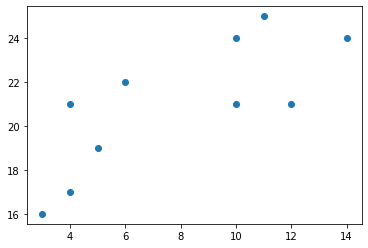

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Nous calculons maintenant le lien de service à l'aide de la distance euclidienne et le visualisons à l'aide d'un dendrogramme :

**Exemple**


**Résultat**

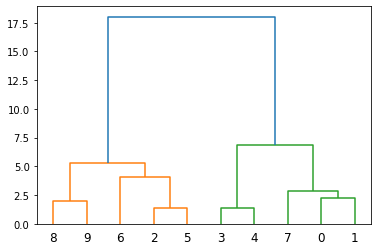

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

Ici, nous faisons la même chose avec la bibliothèque scikit-learn de Python. Ensuite, visualisez sur un graphique en 2 dimensions :
Exemple

**Résultat**

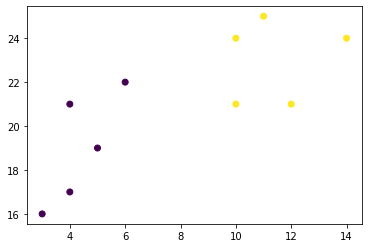

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

Exemple expliqué
Importez les modules dont vous avez besoin.



import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [24]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

Transformez les données en un ensemble de points :

**Résultat:**

In [27]:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


Calculer le lien entre tous les différents points. Ici, nous utilisons une mesure de distance euclidienne simple et la liaison de Ward, qui cherche à minimiser la variance entre les clusters.

In [28]:
linkage_data = linkage(data, method='ward', metric='euclidean')

Enfin, tracez les résultats dans un dendrogramme. Ce graphique nous montrera la hiérarchie des clusters du bas (points individuels) vers le haut (un seul cluster composé de tous les points de données).

plt.show()nous permet de visualiser le dendrogramme au lieu des seules données de liaison brutes.

**Résultat:**

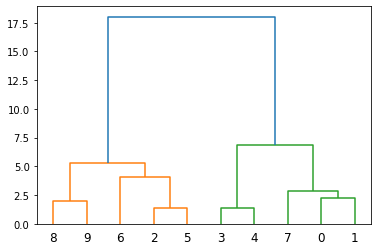

In [29]:
dendrogram(linkage_data)
plt.show()

La bibliothèque scikit-learn nous permet d'utiliser le clustering hiérarchique d'une manière différente. Tout d'abord, nous initialisons la AgglomerativeClusteringclasse avec 2 clusters, en utilisant la même distance euclidienne et la même liaison de Ward.

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

La .fit_predictméthode peut être appelée sur nos données pour calculer les clusters en utilisant les paramètres définis sur le nombre de clusters que nous avons choisi.

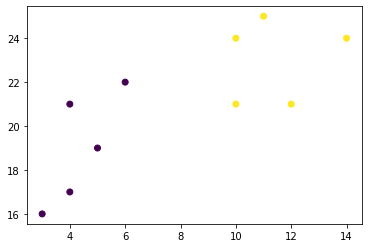

In [32]:
plt.scatter(x, y, c=labels)
plt.show()

**Apprentissage automatique - Régression logistique**

Régression logistique
La régression logistique vise à résoudre des problèmes de classification. Pour ce faire, il prédit des résultats catégoriels, contrairement à la régression linéaire qui prédit un résultat continu.

Dans le cas le plus simple, il y a deux résultats, appelés binomiaux, dont un exemple est de prédire si une tumeur est maligne ou bénigne. D'autres cas ont plus de deux issues à classer, dans ce cas on parle de multinomial. Un exemple courant de régression logistique multinomiale serait de prédire la classe d'une fleur d'iris entre 3 espèces différentes.

Ici, nous utiliserons une régression logistique de base pour prédire une variable binomiale. Cela signifie qu'il n'a que deux résultats possibles.

Comment ça marche?
En Python, nous avons des modules qui feront le travail pour nous. Commencez par importer le module NumP

In [33]:
import numpy

Stockez les variables indépendantes dans X.

Enregistrez la variable dépendante dans y.

Vous trouverez ci-dessous un exemple d'ensemble de données :

In [34]:
#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [35]:
from sklearn import linear_model

In [36]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

Nous avons maintenant un objet de régression logistique qui est prêt à déterminer si une tumeur est cancéreuse en fonction de la taille de la tumeur :

In [37]:
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))

Exemple
Voir l'exemple entier en action :

In [38]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


Nous avons prédit qu'une tumeur d'une taille de 3,46 mm ne sera pas cancéreuse.

Coefficient
Dans la régression logistique, le coefficient est le changement attendu du log-odds d'avoir le résultat par unité de changement dans X.

Cela n'a pas la compréhension la plus intuitive, alors utilisons-la pour créer quelque chose qui a plus de sens, des cotes.

**Exemple**
Voir l'exemple entier en action :

**Résultat**

In [39]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03541657]]


Cela nous indique que lorsque la taille d'une tumeur augmente de 1 mm, les chances qu'il s'agisse d'une tumeur augmentent de 4 fois.

Probabilité
Les valeurs de coefficient et d'ordonnée à l'origine peuvent être utilisées pour trouver la probabilité que chaque tumeur soit cancéreuse.

Créez une fonction qui utilise les valeurs de coefficient et d'interception du modèle pour renvoyer une nouvelle valeur. Cette nouvelle valeur représente la probabilité que l'observation donnée soit une tumeur :

In [40]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

Fonction expliquée
Pour trouver les log-odds pour chaque observation, nous devons d'abord créer une formule qui ressemble à celle de la régression linéaire, en extrayant le coefficient et l'ordonnée à l'origine.

In [41]:
log_odds = logr.coef_ * x + logr.intercept_

pour ensuite convertir les log-odds en cotes, nous devons exponentieller les log-odds.

In [42]:
odds = numpy.exp(log_odds)

Maintenant que nous avons la cote, nous pouvons la convertir en probabilité en la divisant par 1 plus la cote

In [43]:
probability = odds / (1 + odds)

Utilisons maintenant la fonction avec ce que nous avons appris pour connaître la probabilité que chaque tumeur soit cancéreuse.

Exemple
Voir l'exemple entier en action :

In [44]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


Résultats expliqués
3,78 0,61 La probabilité qu'une tumeur de 3,78 cm soit cancéreuse est de 61 %.

2,44 0,19 La probabilité qu'une tumeur de 2,44 cm soit cancéreuse est de 19 %.

2,09 0,13 La probabilité qu'une tumeur de 2,09 cm soit cancéreuse est de 13 %.